In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import feature_selection
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [4]:
train = pd.read_csv("training_set.csv")
test = pd.read_csv("test_set.csv")

train = train.drop(["Unnamed: 0"], axis = 1)
test = test.drop(["Unnamed: 0"], axis = 1)

print("Train Shape :", train.shape)
print("Test  Shape :", test.shape)

Train Shape : (3910, 58)
Test  Shape : (691, 57)


In [6]:
train.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12,0
1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.0,0.56,...,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375,1
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0
3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122,1
4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.0,0.00,...,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207,1


In [8]:
train.tail()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
3905,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,...,0.0,0.000,0.0,0.000,0.000,0.000,1.714,4,12,0
3906,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,...,0.0,0.000,0.0,0.000,0.000,0.000,2.000,3,4,0
3907,0.12,0.0,0.12,0.0,0.0,0.25,0.0,0.00,0.00,0.0,...,0.0,0.093,0.0,0.023,0.000,0.000,1.247,5,131,0
3908,0.00,0.0,0.00,0.0,0.0,0.00,0.0,3.12,0.00,0.0,...,0.0,0.198,0.0,0.198,0.198,0.000,3.857,25,81,1
3909,0.96,0.0,0.48,0.0,0.0,0.96,0.0,0.00,0.48,0.0,...,0.0,0.818,0.0,0.175,0.467,0.116,9.560,259,717,1


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3910 entries, 0 to 3909
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      3910 non-null   float64
 1   X2      3910 non-null   float64
 2   X3      3910 non-null   float64
 3   X4      3910 non-null   float64
 4   X5      3910 non-null   float64
 5   X6      3910 non-null   float64
 6   X7      3910 non-null   float64
 7   X8      3910 non-null   float64
 8   X9      3910 non-null   float64
 9   X10     3910 non-null   float64
 10  X11     3910 non-null   float64
 11  X12     3910 non-null   float64
 12  X13     3910 non-null   float64
 13  X14     3910 non-null   float64
 14  X15     3910 non-null   float64
 15  X16     3910 non-null   float64
 16  X17     3910 non-null   float64
 17  X18     3910 non-null   float64
 18  X19     3910 non-null   float64
 19  X20     3910 non-null   float64
 20  X21     3910 non-null   float64
 21  X22     3910 non-null   float64
 22  

In [7]:
test.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
0,0.70,0.0,0.70,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.105,0.000,0.000,2.342,47,89
1,0.00,0.0,0.84,0.0,0.84,0.00,0.84,0.00,0.00,0.00,...,0.0,0.0,0.388,0.0,0.776,0.129,0.000,10.375,168,249
2,0.46,0.3,0.46,0.0,0.05,0.12,0.05,0.28,0.43,0.74,...,0.0,0.0,0.065,0.0,0.325,0.756,0.153,5.891,193,3040
3,0.10,0.2,1.01,0.0,0.80,0.80,0.50,0.00,0.80,0.10,...,0.0,0.0,0.110,0.0,0.490,0.158,0.015,8.550,669,1351
4,0.00,0.0,0.72,0.0,0.72,0.00,0.72,0.00,0.00,0.00,...,0.0,0.0,0.364,0.0,0.729,0.121,0.000,7.781,32,249


In [9]:
test.tail()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
686,0.25,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.25,0.0,...,0.00,0.301,0.473,0.043,0.043,0.000,0.0,2.111,17,190
687,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.0,...,2.56,0.000,0.000,0.000,0.375,0.000,0.0,2.250,7,36
688,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.0,...,0.00,0.000,0.000,0.000,0.000,0.000,0.0,2.333,5,7
689,0.08,0.08,0.57,0.0,0.48,0.0,0.0,0.08,0.00,0.0,...,0.08,0.011,0.034,0.000,0.057,0.022,0.0,1.875,65,542
690,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.0,...,0.00,0.000,0.000,0.000,0.000,0.000,0.0,2.000,4,16


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691 entries, 0 to 690
Data columns (total 57 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      691 non-null    float64
 1   X2      691 non-null    float64
 2   X3      691 non-null    float64
 3   X4      691 non-null    float64
 4   X5      691 non-null    float64
 5   X6      691 non-null    float64
 6   X7      691 non-null    float64
 7   X8      691 non-null    float64
 8   X9      691 non-null    float64
 9   X10     691 non-null    float64
 10  X11     691 non-null    float64
 11  X12     691 non-null    float64
 12  X13     691 non-null    float64
 13  X14     691 non-null    float64
 14  X15     691 non-null    float64
 15  X16     691 non-null    float64
 16  X17     691 non-null    float64
 17  X18     691 non-null    float64
 18  X19     691 non-null    float64
 19  X20     691 non-null    float64
 20  X21     691 non-null    float64
 21  X22     691 non-null    float64
 22  X2

In [13]:
print("Null Values in Train  :", train.isna())
print("Null Values in Test :", test.isna())

Null Values in Train  :          X1     X2     X3     X4     X5     X6     X7     X8     X9    X10  \
0     False  False  False  False  False  False  False  False  False  False   
1     False  False  False  False  False  False  False  False  False  False   
2     False  False  False  False  False  False  False  False  False  False   
3     False  False  False  False  False  False  False  False  False  False   
4     False  False  False  False  False  False  False  False  False  False   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
3905  False  False  False  False  False  False  False  False  False  False   
3906  False  False  False  False  False  False  False  False  False  False   
3907  False  False  False  False  False  False  False  False  False  False   
3908  False  False  False  False  False  False  False  False  False  False   
3909  False  False  False  False  False  False  False  False  False  False   

      ...    X49    X50    X51    X52  

In [15]:
#train test 4: 1
X_train, X_valid, y_train, y_valid  = train_test_split(train.drop(["Y"], axis = 1).values, train["Y"].values, test_size = 0.2, random_state = 10, stratify = train["Y"].values)

X_test = test.copy()

print("Train Dataset Shape :", X_train.shape)
print("Validation Dataset Shape :", X_valid.shape)
print("Test Dataset Shape :", X_test.shape)
print()
print("Y train length :",len(y_train))
print("Y valid length :",len(y_valid))

Train Dataset Shape : (3128, 57)
Validation Dataset Shape : (782, 57)
Test Dataset Shape : (691, 57)

Y train length : 3128
Y valid length : 782


Exploratory Data Analysis (EDA)

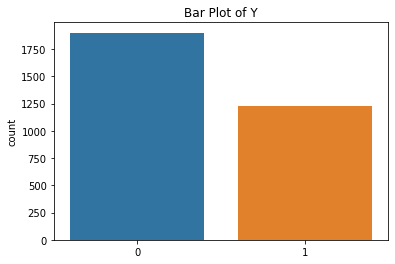

In [17]:
sns.countplot(y_train)
plt.title('Bar Plot of Y')
plt.show()

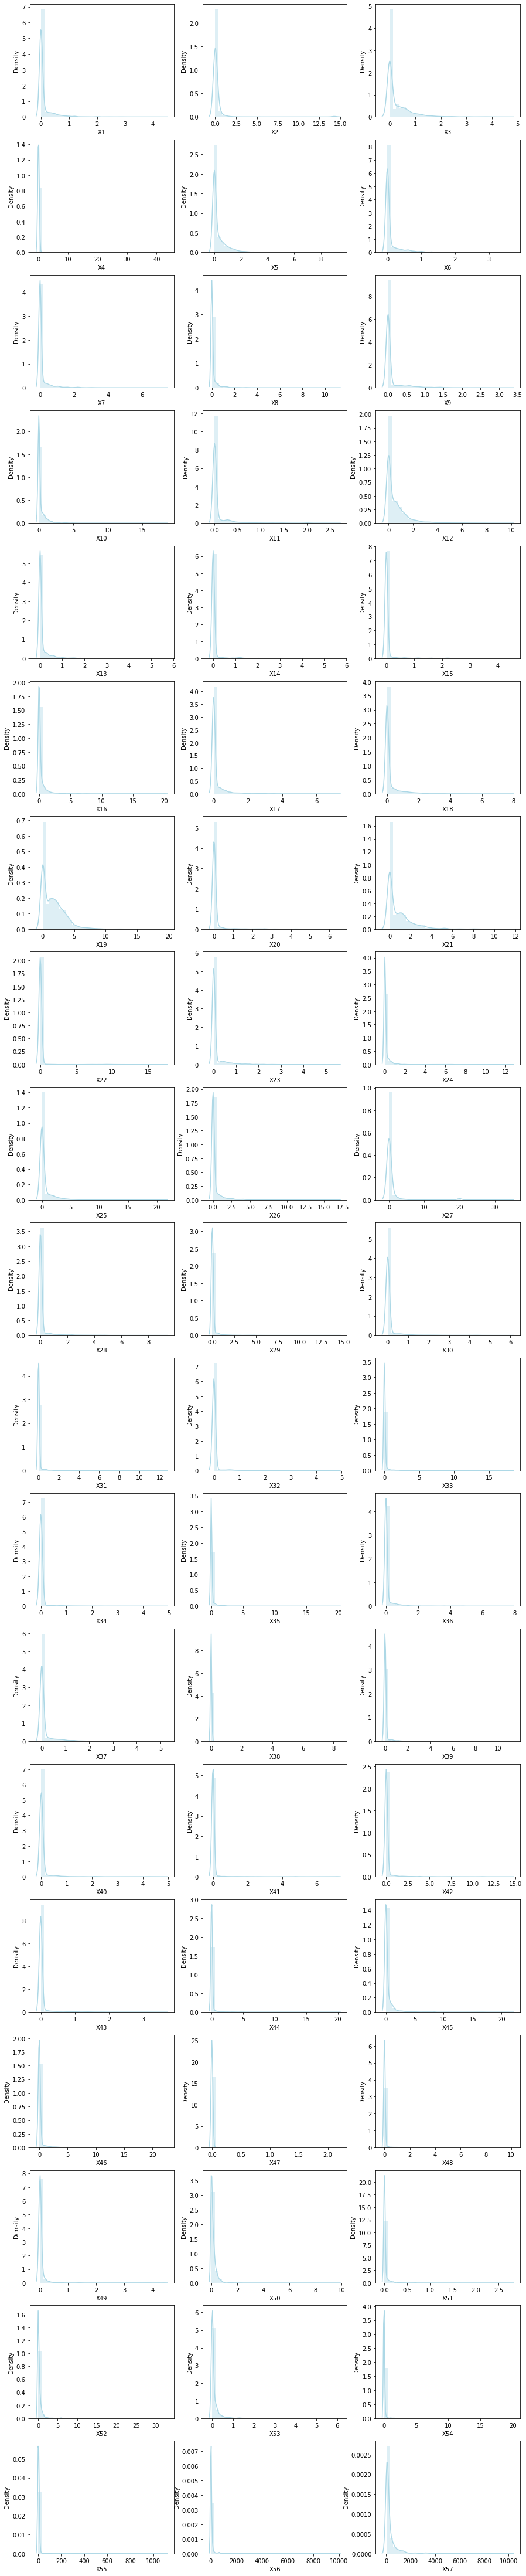

In [18]:
rows = 19
columns = 3
fig,ax = plt.subplots(nrows=19,ncols=3,figsize=(15,80))
for i in range(rows):
    for j in range(columns):
        sns.distplot(train['X'+str(i*3+j+1)], kde=True, bins=int(180/5), ax = ax[i][j], color = 'lightblue')

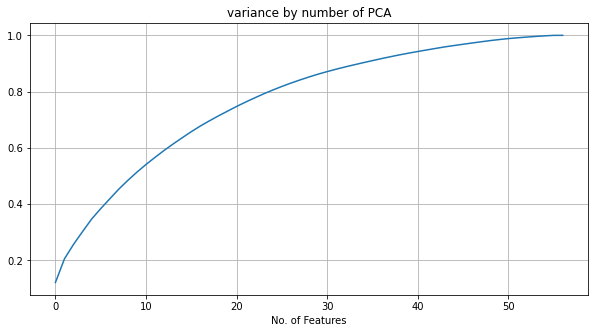

In [19]:
scaler = MinMaxScaler()
X_train_normalize = scaler.fit_transform(X_train)

pca_model = PCA()
X_train_pca = pca_model.fit(X_train_normalize)

plt.figure(figsize = (10, 5))
plt.plot(X_train_pca.explained_variance_ratio_.cumsum())
plt.title('variance by number of PCA')
plt.xlabel("No. of Features")
plt.grid()
plt.show()

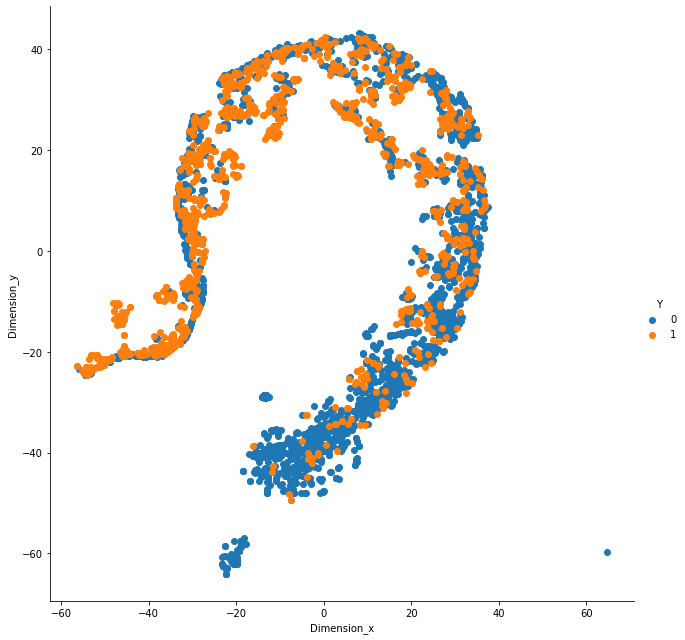

In [22]:
ts = TSNE(n_components=2, verbose=0, perplexity=50, n_iter=1000)
tsne_model = ts.fit_transform(X_train)

tsne_df = pd.DataFrame()
tsne_df['Dimension_x'] = tsne_model[:,0]
tsne_df['Dimension_y'] = tsne_model[:,1]
tsne_df['Y'] = y_train


sns.FacetGrid(tsne_df, hue="Y", size=9).map(plt.scatter, 'Dimension_x', 'Dimension_y').add_legend()
plt.show()

<AxesSubplot:>

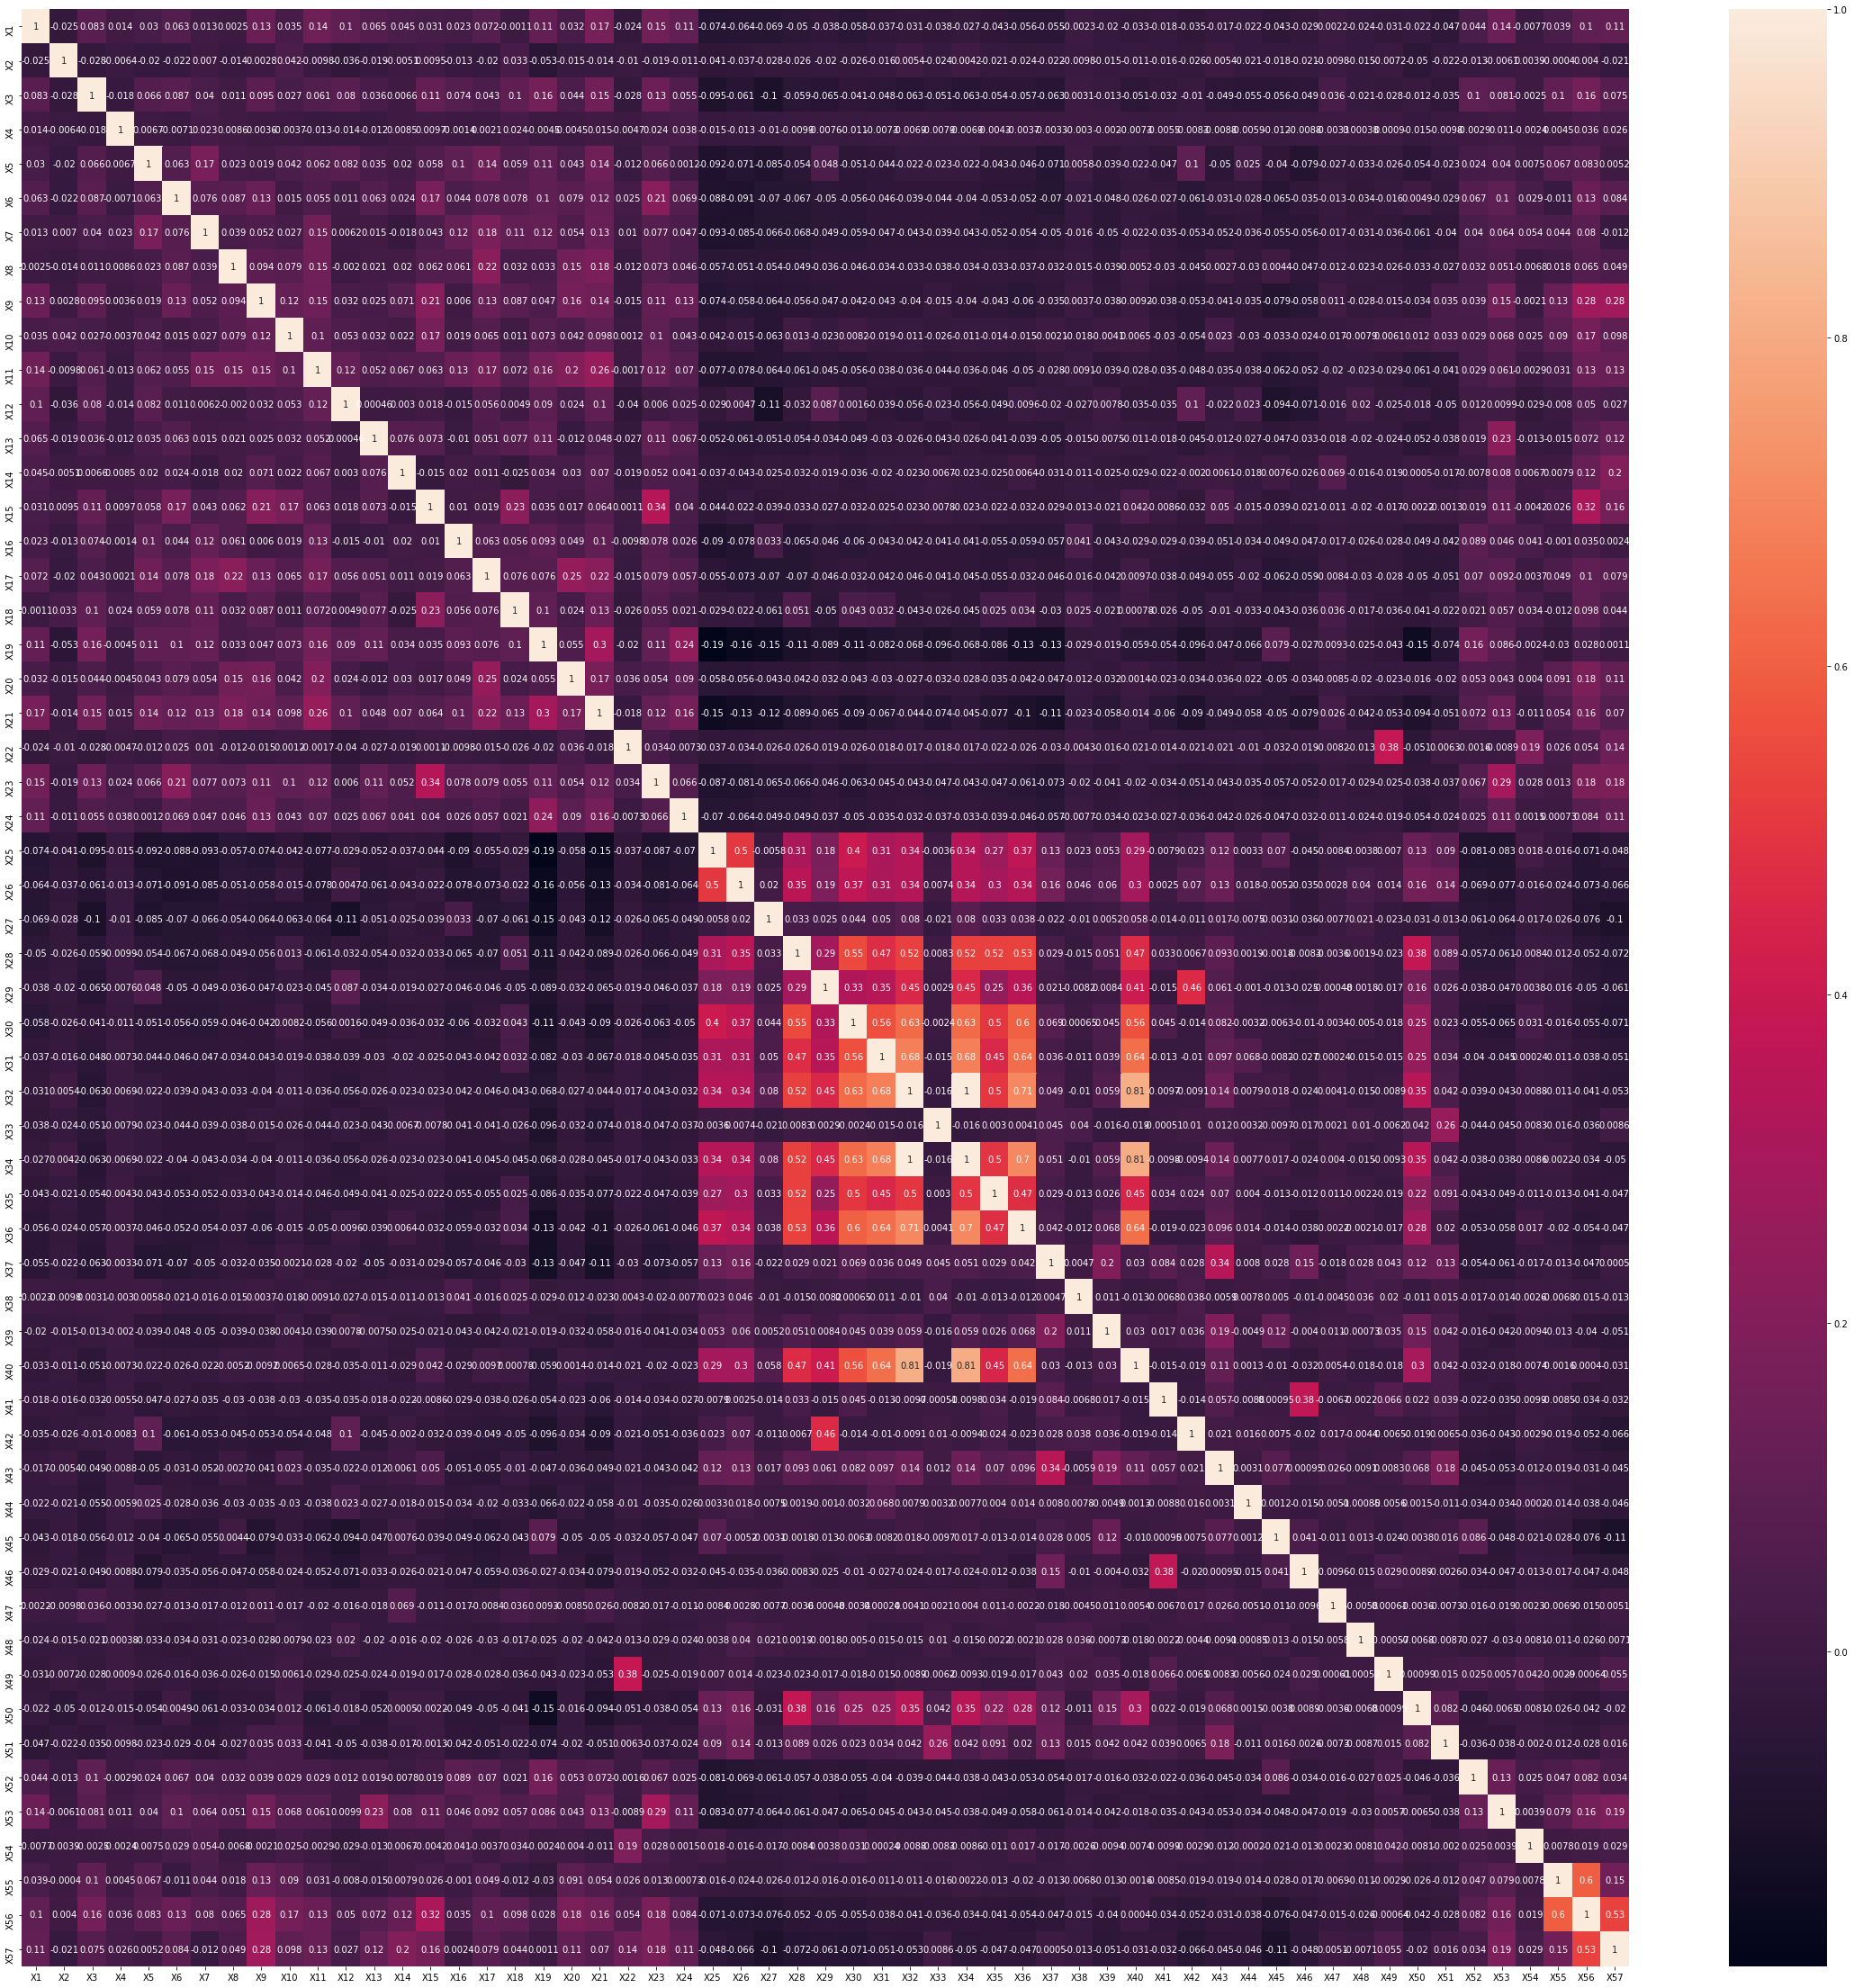

In [26]:
X_train_df = pd.DataFrame(X_train, columns = ["X"+str(i) for i in range(1,58)])
X_valid_df = pd.DataFrame(X_valid, columns = ["X"+str(i) for i in range(1,58)])

plt.figure(figsize = (40,40))
cor = X_train_df.corr()
sns.heatmap(cor, annot = True)


In [27]:
X_train_df = X_train_df.drop(["X32", "X34"], axis = 1)
X_valid_df = X_valid_df.drop(["X32", "X34"], axis = 1)
X_test = test.drop(["X32", "X34"], axis = 1)

print("Train Dataset Shape :", X_train_df.shape)
print("Test Dataset Shape :", X_test.shape)

Train Dataset Shape : (3128, 55)
Test Dataset Shape : (691, 55)


In [18]:
columns = X_train_df.columns
sparse_df = pd.DataFrame()
sparse_df['Features'] = columns
non_zero = []
for i in columns:
    non_zero_values = np.count_nonzero(X_train_df[i].values)
    non_zero.append((non_zero_values/len(X_train_df))*100)
sparse_df['Sparsity in %'] = non_zero
sparse_df.sort_values(by = 'Sparsity in %', ascending = False)

,Features,Sparsity in %
54,X57,100.000000
53,X56,100.000000
52,X55,100.000000
18,X19,70.524297
47,X50,59.526854
20,X21,52.909207
11,X12,51.182864
49,X52,48.433504
2,X3,40.696931
4,X5,37.915601


In [28]:
X_train_df = X_train_df.drop(["X57", "X56", "X55"], axis = 1)
X_valid_df = X_valid_df.drop(["X57", "X56", "X55"], axis = 1)
X_test = X_test.drop(["X57", "X56", "X55"], axis = 1)

print("Train Dataset Shape :", X_train_df.shape)
print("Validation Dataset Shape :", X_valid_df.shape)
print("Test Dataset Shape :", X_test.shape)

Train Dataset Shape : (3128, 52)
Validation Dataset Shape : (782, 52)
Test Dataset Shape : (691, 52)


In [29]:
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train_df)
X_train_scaler_df = pd.DataFrame(X_train_scaler, columns = X_train_df.columns)

decision_tree = DecisionTreeClassifier(random_state = 15)
parameters = {"max_depth" : [1, 5, 10, 25, 50, 75, 100], "min_samples_split" : [1, 5, 10, 25, 50, 100, 250, 500]}
clf = GridSearchCV(decision_tree, parameters, scoring="accuracy", n_jobs = -1)
search = clf.fit(X_train_scaler, y_train)
print("Best Parameters :", search.best_params_)

Best Parameters : {'max_depth': 10, 'min_samples_split': 25}


In [30]:
decision_tree = DecisionTreeClassifier(max_depth = 10, min_samples_split = 25, random_state = 15)
decision_tree.fit(X_train_scaler_df, y_train)
decision_tree.feature_importances_

array([0.00046885, 0.        , 0.00081491, 0.00279856, 0.        ,
       0.00546874, 0.19420418, 0.        , 0.00382096, 0.00633533,
       0.00155203, 0.        , 0.        , 0.00193102, 0.        ,
       0.03825012, 0.00957411, 0.        , 0.01132961, 0.        ,
       0.01588776, 0.        , 0.00364935, 0.02732613, 0.06389289,
       0.00147217, 0.02390349, 0.00287858, 0.        , 0.00441274,
       0.        , 0.00150789, 0.        , 0.        , 0.00829129,
       0.        , 0.        , 0.        , 0.        , 0.01174324,
       0.        , 0.        , 0.01915325, 0.02917257, 0.        ,
       0.00149367, 0.00616602, 0.00231638, 0.00139681, 0.09570142,
       0.40308593, 0.        ])

Text(0, 0.5, 'Features')

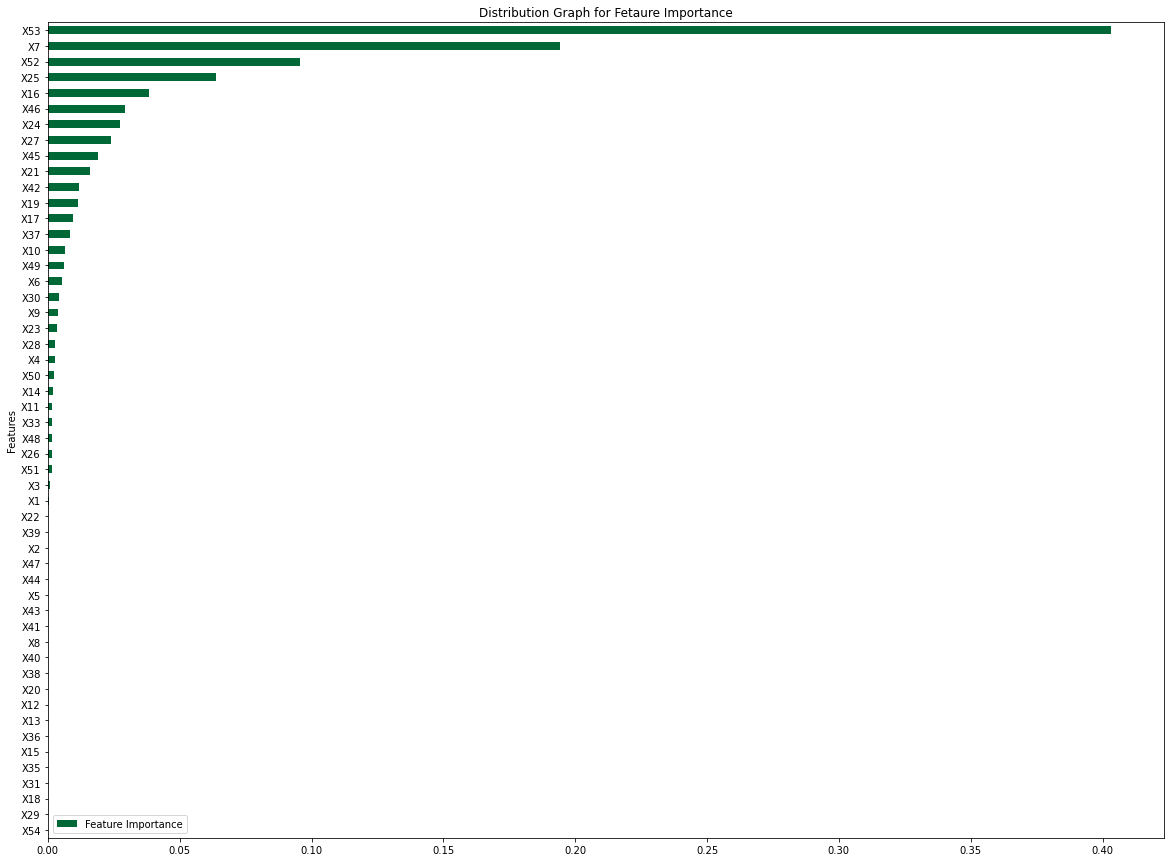

In [39]:
feature_importance_df = pd.DataFrame()
feature_importance_df['Features'] = X_train_scaler_df.columns
feature_importance_df['Feature Importance'] = decision_tree.feature_importances_
feature_importance_df = feature_importance_df.sort_values(by = 'Feature Importance')

feature_importance_df.set_index('Features').plot.barh(figsize = (20,15), title = "Distribution Graph for Fetaure Importance",cmap="Grens")
plt.ylabel("Features")

In [40]:
unimportant_features = feature_importance_df[feature_importance_df['Feature Importance'] == 0.0]['Features'].values
unimportant_features

array(['X54', 'X29', 'X18', 'X31', 'X35', 'X15', 'X36', 'X13', 'X12',
       'X20', 'X38', 'X40', 'X8', 'X41', 'X43', 'X5', 'X44', 'X47', 'X2',
       'X39', 'X22'], dtype=object)

In [41]:
X_train_df = X_train_df.drop(unimportant_features, axis = 1)
X_valid_df = X_valid_df.drop(unimportant_features, axis = 1)
X_test = X_test.drop(unimportant_features, axis = 1)

print("Train Dataset Shape :", X_train_df.shape)
print("Validation Dataset Shape :", X_valid_df.shape)
print("Test Dataset Shape :", X_test.shape)

Train Dataset Shape : (3128, 31)
Validation Dataset Shape : (782, 31)
Test Dataset Shape : (691, 31)


In [42]:
scaler = MinMaxScaler()
scaler.fit(X_train_df.values)

X_train_normalize = scaler.transform(X_train_df.values)
X_valid_normalize = scaler.transform(X_valid_df.values)
X_test_normalize = scaler.transform(X_test.values)

print(X_train_normalize.shape)
print(X_valid_normalize.shape)
print(X_test_normalize.shape)

(3128, 31)
(782, 31)
(691, 31)


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 221.45it/s]


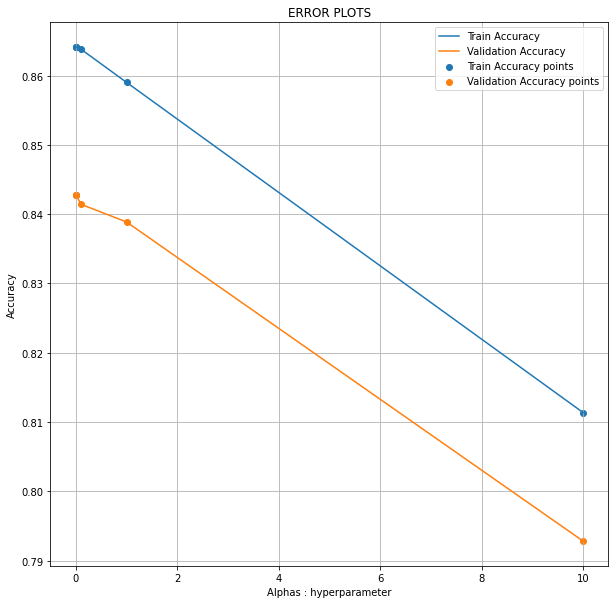

In [43]:
# Naive Bayes algorithm
train_acc = []
valid_acc = []
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10]

for i in tqdm(alphas):
    naive = MultinomialNB(alpha = i)
    naive.fit(X_train_normalize, y_train)
    
    train_acc.append(naive.score(X_train_normalize, y_train))
    valid_acc.append(naive.score(X_valid_normalize, y_valid))
    

plt.figure(figsize = (10,10))
plt.plot(alphas, train_acc, label='Train Accuracy')
plt.plot(alphas, valid_acc, label='Validation Accuracy')

plt.scatter(alphas, train_acc, label='Train Accuracy points')
plt.scatter(alphas, valid_acc, label='Validation Accuracy points')

plt.legend()
plt.xlabel("Alphas : hyperparameter")
plt.ylabel("Accuracy")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [44]:
for i in range(len(alphas)):
    print("For Alpha = {} , Train Accuracy = {} , Validation Accuracy = {}".format(alphas[i],train_acc[i],valid_acc[i]))

For Alpha = 0.0001 , Train Accuracy = 0.8641304347826086 , Validation Accuracy = 0.8427109974424553
For Alpha = 0.001 , Train Accuracy = 0.8641304347826086 , Validation Accuracy = 0.8427109974424553
For Alpha = 0.01 , Train Accuracy = 0.8641304347826086 , Validation Accuracy = 0.8427109974424553
For Alpha = 0.1 , Train Accuracy = 0.8638107416879796 , Validation Accuracy = 0.8414322250639387
For Alpha = 1 , Train Accuracy = 0.8590153452685422 , Validation Accuracy = 0.8388746803069054
For Alpha = 10 , Train Accuracy = 0.8113810741687979 , Validation Accuracy = 0.7928388746803069


In [45]:
print("Train AUC Score :", roc_auc_score(y_train, naive.predict(X_train_normalize)))
print("Validation AUC Score :", roc_auc_score(y_valid, naive.predict(X_valid_normalize)))

Train AUC Score : 0.7643439925882959
Validation AUC Score : 0.7430687467855306


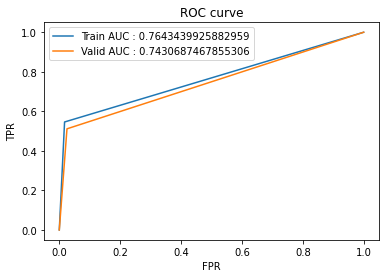

In [47]:
fpr_train, tpr_train, _ = roc_curve(y_train, naive.predict(X_train_normalize))
fpr_valid, tpr_valid, _ = roc_curve(y_valid, naive.predict(X_valid_normalize))

auc_train_score = roc_auc_score(y_train, naive.predict(X_train_normalize))
auc_valid_score = roc_auc_score(y_valid, naive.predict(X_valid_normalize))

fig, ax = plt.subplots()
ax.plot(fpr_train, tpr_train, label = 'Train AUC : {}'.format(auc_train_score))
ax.plot(fpr_valid, tpr_valid, label = 'Valid AUC : {}'.format(auc_valid_score))
ax.legend()

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.80it/s]


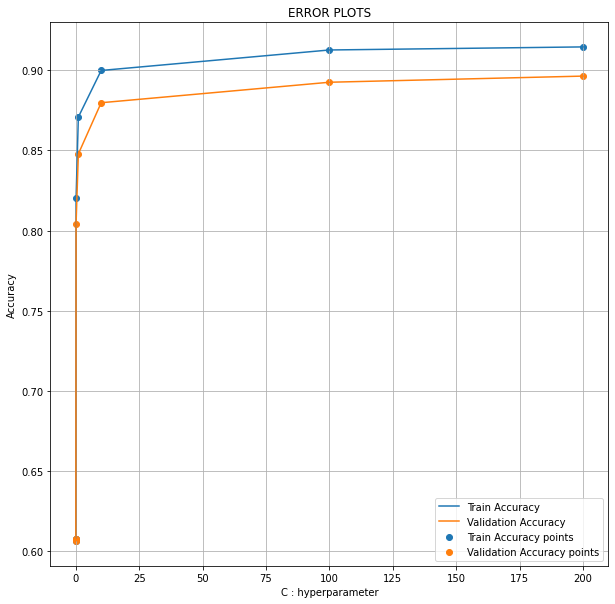

In [48]:
# logistic regression algorithm
train_acc = []
valid_acc = []
c = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 200]

for i in tqdm(c):
    log_reg = LogisticRegression(C = i, random_state = 15)
    log_reg.fit(X_train_normalize, y_train)
    
    train_acc.append(log_reg.score(X_train_normalize, y_train))
    valid_acc.append(log_reg.score(X_valid_normalize, y_valid))
    

plt.figure(figsize = (10,10))
plt.plot(c, train_acc, label='Train Accuracy')
plt.plot(c, valid_acc, label='Validation Accuracy')

plt.scatter(c, train_acc, label='Train Accuracy points')
plt.scatter(c, valid_acc, label='Validation Accuracy points')

plt.legend()
plt.xlabel("C : hyperparameter")
plt.ylabel("Accuracy")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [49]:
for i in range(len(c)):
    print("For Alpha = {} , Train Accuracy = {} , Validation Accuracy = {}".format(c[i],train_acc[i],valid_acc[i]))

For Alpha = 0.0001 , Train Accuracy = 0.6077365728900256 , Validation Accuracy = 0.6074168797953964
For Alpha = 0.001 , Train Accuracy = 0.6077365728900256 , Validation Accuracy = 0.6074168797953964
For Alpha = 0.01 , Train Accuracy = 0.606457800511509 , Validation Accuracy = 0.6061381074168798
For Alpha = 0.1 , Train Accuracy = 0.8200127877237852 , Validation Accuracy = 0.8043478260869565
For Alpha = 1 , Train Accuracy = 0.870843989769821 , Validation Accuracy = 0.8478260869565217
For Alpha = 10 , Train Accuracy = 0.8999360613810742 , Validation Accuracy = 0.8797953964194374
For Alpha = 100 , Train Accuracy = 0.9127237851662404 , Validation Accuracy = 0.8925831202046036
For Alpha = 200 , Train Accuracy = 0.9146419437340153 , Validation Accuracy = 0.8964194373401535


In [50]:
print("Train AUC Score :", roc_auc_score(y_train, log_reg.predict(X_train_normalize)))
print("Validation AUC Score :", roc_auc_score(y_valid, log_reg.predict(X_valid_normalize)))

Train AUC Score : 0.9030452809335111
Validation AUC Score : 0.8830550317160979


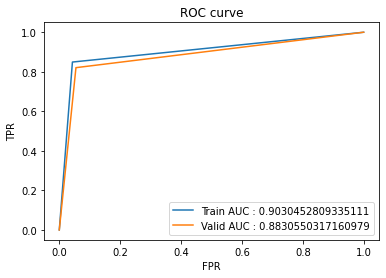

In [51]:
fpr_train, tpr_train, _ = roc_curve(y_train, log_reg.predict(X_train_normalize))
fpr_valid, tpr_valid, _ = roc_curve(y_valid, log_reg.predict(X_valid_normalize))

auc_train_score = roc_auc_score(y_train, log_reg.predict(X_train_normalize))
auc_valid_score = roc_auc_score(y_valid, log_reg.predict(X_valid_normalize))

fig, ax = plt.subplots()
ax.plot(fpr_train, tpr_train, label = 'Train AUC : {}'.format(auc_train_score))
ax.plot(fpr_valid, tpr_valid, label = 'Valid AUC : {}'.format(auc_valid_score))
ax.legend()

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:23<00:00,  1.02it/s]


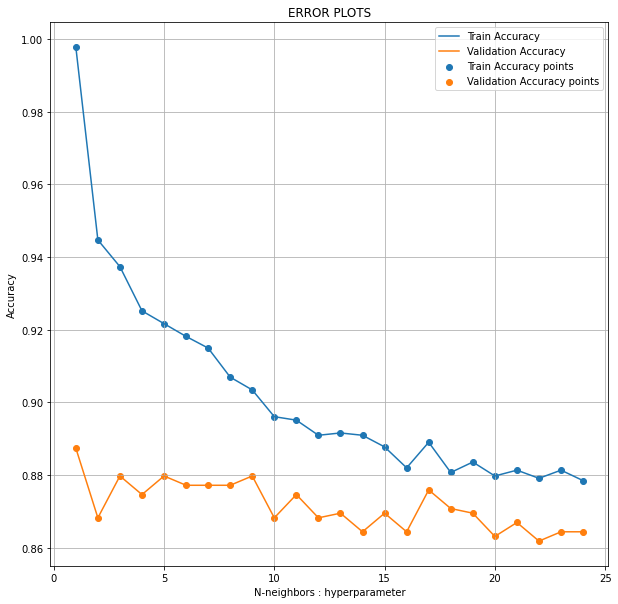

In [52]:
# K-Nearest Neigbour algorithm
train_acc = []
valid_acc = []
n_neighbors = range(1,25)

for i in tqdm(n_neighbors):
    knn = KNeighborsClassifier(n_neighbors = i, n_jobs = -1)
    knn.fit(X_train_normalize, y_train)
    
    train_acc.append(knn.score(X_train_normalize, y_train))
    valid_acc.append(knn.score(X_valid_normalize, y_valid))
    
plt.figure(figsize = (10,10))
plt.plot(n_neighbors, train_acc, label='Train Accuracy')
plt.plot(n_neighbors, valid_acc, label='Validation Accuracy')

plt.scatter(n_neighbors, train_acc, label='Train Accuracy points')
plt.scatter(n_neighbors, valid_acc, label='Validation Accuracy points')

plt.legend()
plt.xlabel("N-neighbors : hyperparameter")
plt.ylabel("Accuracy")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [53]:
 for i in range(len(n_neighbors)):
    print("For K-neighbors = {} , Train Accuracy = {} , Validation Accuracy = {}".format(n_neighbors[i],train_acc[i],valid_acc[i]))

For K-neighbors = 1 , Train Accuracy = 0.9977621483375959 , Validation Accuracy = 0.887468030690537
For K-neighbors = 2 , Train Accuracy = 0.944693094629156 , Validation Accuracy = 0.8682864450127877
For K-neighbors = 3 , Train Accuracy = 0.9373401534526854 , Validation Accuracy = 0.8797953964194374
For K-neighbors = 4 , Train Accuracy = 0.9251918158567775 , Validation Accuracy = 0.8746803069053708
For K-neighbors = 5 , Train Accuracy = 0.9216751918158568 , Validation Accuracy = 0.8797953964194374
For K-neighbors = 6 , Train Accuracy = 0.9181585677749361 , Validation Accuracy = 0.8772378516624041
For K-neighbors = 7 , Train Accuracy = 0.9149616368286445 , Validation Accuracy = 0.8772378516624041
For K-neighbors = 8 , Train Accuracy = 0.9069693094629157 , Validation Accuracy = 0.8772378516624041
For K-neighbors = 9 , Train Accuracy = 0.9034526854219949 , Validation Accuracy = 0.8797953964194374
For K-neighbors = 10 , Train Accuracy = 0.8960997442455243 , Validation Accuracy = 0.86828644

In [54]:
print("Train AUC Score :", roc_auc_score(y_train, knn.predict(X_train_normalize)))
print("Validation AUC Score :", roc_auc_score(y_valid, knn.predict(X_valid_normalize)))

Train AUC Score : 0.8616213231400965
Validation AUC Score : 0.8475227155837476


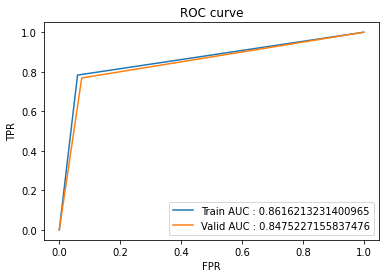

In [55]:
fpr_train, tpr_train, _ = roc_curve(y_train, knn.predict(X_train_normalize))
fpr_valid, tpr_valid, _ = roc_curve(y_valid, knn.predict(X_valid_normalize))

auc_train_score = roc_auc_score(y_train, knn.predict(X_train_normalize))
auc_valid_score = roc_auc_score(y_valid, knn.predict(X_valid_normalize))

fig, ax = plt.subplots()
ax.plot(fpr_train, tpr_train, label = 'Train AUC : {}'.format(auc_train_score))
ax.plot(fpr_valid, tpr_valid, label = 'Valid AUC : {}'.format(auc_valid_score))
ax.legend()

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [56]:
# Support Vector Classifier (SVC) algorithm
parameters = {'kernel': ('linear', 'rbf'), 'C':[0.0001, 0.001, 0.01, 0.1, 1, 10, 25, 50, 75, 100]}

svc = SVC(random_state = 15)

clf = GridSearchCV(svc, parameters, scoring = "accuracy", n_jobs = -1, return_train_score = True)
search = clf.fit(X_train_normalize, y_train)
print("Best Parameters :", search.best_params_)

Best Parameters : {'C': 10, 'kernel': 'rbf'}


In [57]:
svc = SVC(C = 10, kernel = 'rbf', random_state = 10)
svc.fit(X_train_normalize, y_train)
print("In SVC for Best Parameter :", search.best_params_)
print("Train Accuracy :", svc.score(X_train_normalize, y_train))
print("Validation Accuracy :", svc.score(X_valid_normalize, y_valid))

print("\nTrain AUC Score :", roc_auc_score(y_train, svc.predict(X_train_normalize)))
print("Validation AUC Score :", roc_auc_score(y_valid, svc.predict(X_valid_normalize)))

In SVC for Best Parameter : {'C': 10, 'kernel': 'rbf'}
Train Accuracy : 0.9555626598465473
Validation Accuracy : 0.9258312020460358

Train AUC Score : 0.9494258801720195
Validation AUC Score : 0.9193622492713869


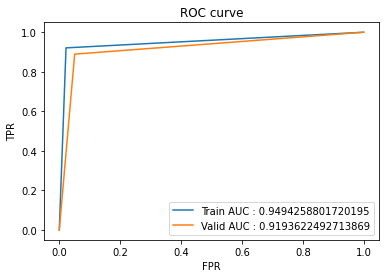

In [58]:
fpr_train, tpr_train, _ = roc_curve(y_train, svc.predict(X_train_normalize))
fpr_valid, tpr_valid, _ = roc_curve(y_valid, svc.predict(X_valid_normalize))

auc_train_score = roc_auc_score(y_train, svc.predict(X_train_normalize))
auc_valid_score = roc_auc_score(y_valid, svc.predict(X_valid_normalize))

fig, ax = plt.subplots()
ax.plot(fpr_train, tpr_train, label = 'Train AUC : {}'.format(auc_train_score))
ax.plot(fpr_valid, tpr_valid, label = 'Valid AUC : {}'.format(auc_valid_score))
ax.legend()

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [59]:
decision_tree = DecisionTreeClassifier(random_state = 15)
parameters = {"max_depth" : [1, 5, 10, 25, 50, 75, 100], "min_samples_split" : [1, 5, 10, 25, 50, 100, 250, 500]}
clf = GridSearchCV(decision_tree, parameters, scoring="accuracy", n_jobs = -1)
search = clf.fit(X_train_normalize, y_train)
print("Best Parameters :", search.best_params_)

Best Parameters : {'max_depth': 10, 'min_samples_split': 25}


In [60]:
decision_tree = DecisionTreeClassifier(max_depth = 10, min_samples_split = 5, random_state = 15)
decision_tree.fit(X_train_normalize, y_train)
print("In Decision Tree for Best Parameter :", search.best_params_)
print("Train Accuracy :", decision_tree.score(X_train_normalize, y_train))
print("Validation Accuracy :", decision_tree.score(X_valid_normalize, y_valid))

print("\nTrain AUC Score :", roc_auc_score(y_train, decision_tree.predict(X_train_normalize)))
print("Validation AUC Score :", roc_auc_score(y_valid, decision_tree.predict(X_valid_normalize)))

In Decision Tree for Best Parameter : {'max_depth': 10, 'min_samples_split': 25}
Train Accuracy : 0.9613171355498721
Validation Accuracy : 0.9168797953964194

Train AUC Score : 0.9540157520148749
Validation AUC Score : 0.9079615978055889


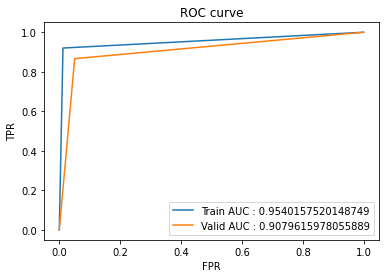

In [61]:
fpr_train, tpr_train, _ = roc_curve(y_train, decision_tree.predict(X_train_normalize))
fpr_valid, tpr_valid, _ = roc_curve(y_valid, decision_tree.predict(X_valid_normalize))

auc_train_score = roc_auc_score(y_train, decision_tree.predict(X_train_normalize))
auc_valid_score = roc_auc_score(y_valid, decision_tree.predict(X_valid_normalize))

fig, ax = plt.subplots()
ax.plot(fpr_train, tpr_train, label = 'Train AUC : {}'.format(auc_train_score))
ax.plot(fpr_valid, tpr_valid, label = 'Valid AUC : {}'.format(auc_valid_score))
ax.legend()

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [62]:
random_forest = RandomForestClassifier(random_state = 15, n_jobs = -1)
parameters = {"n_estimators" : [5, 10, 15, 20 ,25, 50, 100, 250], 
              "max_depth" : [1, 5, 10, 15, 20 ,25, 50, 100], 
              "min_samples_split" : [1, 5, 10, 25, 50, 100]}
clf = GridSearchCV(random_forest, parameters, scoring="accuracy", n_jobs = -1)
search = clf.fit(X_train_normalize, y_train)
print("Best Parameters :", search.best_params_)

Best Parameters : {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 15}


In [63]:
random_forest = RandomForestClassifier(n_estimators = 50, max_depth = 5, min_samples_split = 50, random_state = 15)
random_forest.fit(X_train_normalize, y_train)
print("In Random Forest for Best Parameter :", search.best_params_)
print("Train Accuracy :", random_forest.score(X_train_normalize, y_train))
print("Validation Accuracy :", random_forest.score(X_valid_normalize, y_valid))

print("\nTrain AUC Score :", roc_auc_score(y_train, random_forest.predict(X_train_normalize)))
print("Validation AUC Score :", roc_auc_score(y_valid, random_forest.predict(X_valid_normalize)))

In Random Forest for Best Parameter : {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 15}
Train Accuracy : 0.928388746803069
Validation Accuracy : 0.9232736572890026

Train AUC Score : 0.9155109458540029
Validation AUC Score : 0.9114966569518259


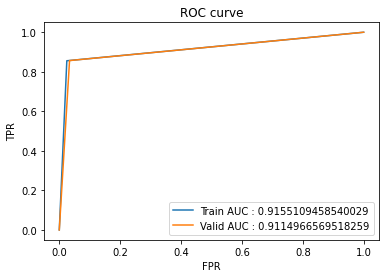

In [64]:
fpr_train, tpr_train, _ = roc_curve(y_train, random_forest.predict(X_train_normalize))
fpr_valid, tpr_valid, _ = roc_curve(y_valid, random_forest.predict(X_valid_normalize))

auc_train_score = roc_auc_score(y_train, random_forest.predict(X_train_normalize))
auc_valid_score = roc_auc_score(y_valid, random_forest.predict(X_valid_normalize))

fig, ax = plt.subplots()
ax.plot(fpr_train, tpr_train, label = 'Train AUC : {}'.format(auc_train_score))
ax.plot(fpr_valid, tpr_valid, label = 'Valid AUC : {}'.format(auc_valid_score))
ax.legend()

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [67]:
# XGBoost Classifier algorithm
xgb_classifier = XGBClassifier(random_state = 15, n_jobs = -1)
parameters = {"n_estimators" : [5, 10, 15, 20 ,25, 50, 100, 250], 
              "max_depth" : [1, 5, 10, 15, 20 ,25, 50, 100], 
              "min_samples_split" : [1, 5, 10, 25, 50, 100]}
clf = GridSearchCV(xgb_classifier, parameters, scoring="accuracy", n_jobs = -1)
search = clf.fit(X_train_normalize, y_train)
print("Best Parameters :", search.best_params_)

[23:45:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:45:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Parameters : {'max_depth': 10, 'min_samples_split': 1, 'n_estimators': 20}


In [68]:
xgb_classifier = XGBClassifier(n_estimators = 100, max_depth = 50, min_samples_split = 1, random_state = 15)
xgb_classifier.fit(X_train_normalize, y_train)
print("In XGBoost Classifier for Best Parameter :", search.best_params_)
print("Train Accuracy :", xgb_classifier.score(X_train_normalize, y_train))
print("Validation Accuracy :", xgb_classifier.score(X_valid_normalize, y_valid))

print("\nTrain AUC Score :", roc_auc_score(y_train, xgb_classifier.predict(X_train_normalize)))
print("Validation AUC Score :", roc_auc_score(y_valid, xgb_classifier.predict(X_valid_normalize)))

[23:45:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:45:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
In XGBoost Classifier for Best Parameter : {'max_depth': 10, 'min_samples_split': 1, 'n_estimators': 20}
Train Accuracy : 0.9971227621483376
Validation Accuracy : 0.9309462915601023

Train AUC Score : 0.9964769968364782
Validation AUC Score : 0.9264529401680096


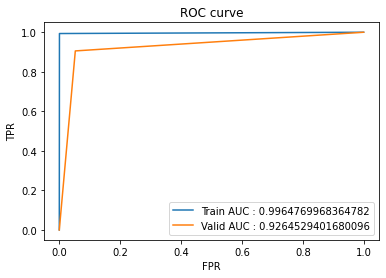

In [69]:
fpr_train, tpr_train, _ = roc_curve(y_train, xgb_classifier.predict(X_train_normalize))
fpr_valid, tpr_valid, _ = roc_curve(y_valid, xgb_classifier.predict(X_valid_normalize))

auc_train_score = roc_auc_score(y_train, xgb_classifier.predict(X_train_normalize))
auc_valid_score = roc_auc_score(y_valid, xgb_classifier.predict(X_valid_normalize))

fig, ax = plt.subplots()
ax.plot(fpr_train, tpr_train, label = 'Train AUC : {}'.format(auc_train_score))
ax.plot(fpr_valid, tpr_valid, label = 'Valid AUC : {}'.format(auc_valid_score))
ax.legend()

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [70]:
from prettytable import PrettyTable

myTable = PrettyTable(["Model", "Train Accuracy", "Valid Accuracy", "Train AUC", "Validation AUC"])

myTable.add_row(["Navie Bayes", "84.9104%", "85.6777%", "0.7278", "0.7406"])
myTable.add_row(["Logistic Regression", "91.4322%", "93.9897%", "0.9052", "0.9332"])
myTable.add_row(["K-Nearest Neigbour (KNN)", "93.6061%", "90.1534%", "0.8723", "0.8706"])
myTable.add_row(["Suport Vector Classifier (SVC)", "95.7161%", "93.9897%", "0.9524", "0.9390"])
myTable.add_row(["Decision Tree", "96.3554%", "93.2225%", "0.9577", "0.9292"])
myTable.add_row(["Random Forest", "92.5191%", "93.0946%", "0.9102", "0.9201"])
myTable.add_row(["XGBoost", "99.6803%", "95.0127%", "0.9959", "0.9485"])

print(myTable)

+--------------------------------+----------------+----------------+-----------+----------------+
|             Model              | Train Accuracy | Valid Accuracy | Train AUC | Validation AUC |
+--------------------------------+----------------+----------------+-----------+----------------+
|          Navie Bayes           |    84.9104%    |    85.6777%    |   0.7278  |     0.7406     |
|      Logistic Regression       |    91.4322%    |    93.9897%    |   0.9052  |     0.9332     |
|    K-Nearest Neigbour (KNN)    |    93.6061%    |    90.1534%    |   0.8723  |     0.8706     |
| Suport Vector Classifier (SVC) |    95.7161%    |    93.9897%    |   0.9524  |     0.9390     |
|         Decision Tree          |    96.3554%    |    93.2225%    |   0.9577  |     0.9292     |
|         Random Forest          |    92.5191%    |    93.0946%    |   0.9102  |     0.9201     |
|            XGBoost             |    99.6803%    |    95.0127%    |   0.9959  |     0.9485     |
+-------------------

In [71]:
xgb_classifier = XGBClassifier(n_estimators = 100, max_depth = 50, min_samples_split = 1, random_state = 15)
xgb_classifier.fit(X_train_normalize, y_train)
y_test_predict = xgb_classifier.predict(X_test_normalize)
y_test_predict

[23:45:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:45:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,

In [72]:
submission = pd.DataFrame()
submission['y_test_predict'] = y_test_predict
submission.to_csv("submission.csv", index=False)